In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel('/Users/abilfad/Desktop/hrs data case/Data Fuel Share/data/RITASE EX-42-44 PERJAM 2022.xlsx',sheet_name='Januari',skiprows=[0])
data = data.iloc[:,1:]
data.head()

,LOADER,EX42,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,JAM,6,7,8,9,10,11,12,13,14,...,20,21,22,23,24,1,2,3,4,5
1,2022-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,13,14,13,8,0,0,5,10,11,10
2,2022-01-02 00:00:00,2,6,5,3,7,6,0,7,11,...,14,15,18,13,0,15,15,17,2,7
3,2022-01-03 00:00:00,0,11,4,0,0,0,0,7,10,...,15,13,12,12,0,11,13,13,7,0
4,2022-01-04 00:00:00,0,0,7,11,11,10,0,11,13,...,12,11,11,10,0,11,11,8,5,9


In [4]:
data.columns

Index(['LOADER', 'EX42', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'EX44', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49'],
      dtype='object')

In [5]:
cols_a = ['LOADER', 'EX42', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24','Unnamed: 25']
a = data[cols_a]
a = a.rename(columns=a.iloc[0])
a = a.loc[1:,:]
cols_a = a.columns

a_vars = pd.melt(a,id_vars=['JAM'],value_vars=a[1:])
a_vars = a_vars.sort_values('JAM')
a_vars['waktu'] = pd.to_datetime(a_vars.JAM) + a_vars.variable.astype('timedelta64[h]')
a_fix = a_vars[['waktu','value']]

a_fix

,waktu,value
0,2022-01-01 06:00:00,0
589,2022-01-01 01:00:00,0
217,2022-01-01 13:00:00,0
31,2022-01-01 07:00:00,0
279,2022-01-01 15:00:00,0
...,...,...
588,2022-02-01 00:00:00,0
619,2022-01-31 01:00:00,7
650,2022-01-31 02:00:00,10
340,2022-01-31 16:00:00,11


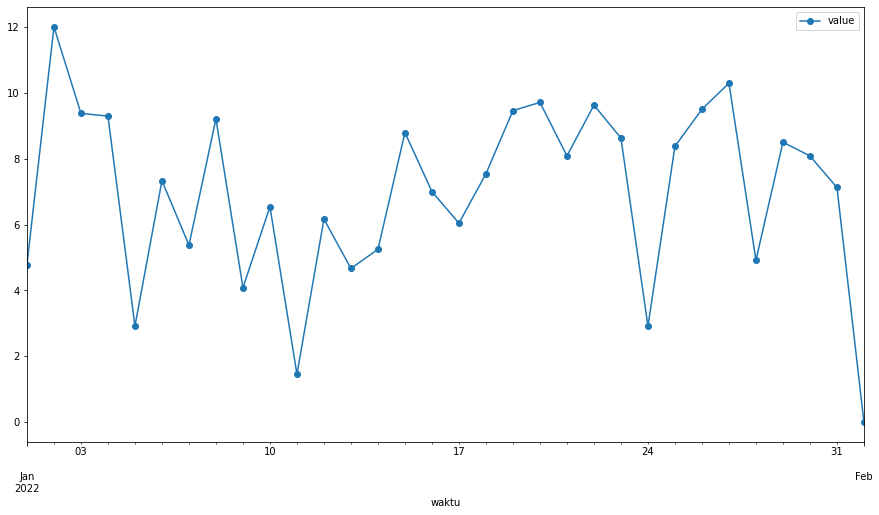

In [13]:
cols_b = ['LOADER', 'EX44', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49']

b = data[cols_b]
b = b.rename(columns=b.iloc[0])
b = b.loc[1:,:]
cols_b = b.columns

b_vars = pd.melt(b,id_vars=['JAM'],value_vars=b[1:])
b_vars = b_vars.sort_values('JAM')
b_vars['waktu'] = pd.to_datetime(b_vars.JAM) + b_vars.variable.astype('timedelta64[h]')
b_fix = b_vars[['waktu','value']]

b_fix.set_index('waktu').resample('D').mean().plot(figsize=(15,8),style='-o')


In [11]:
b_fix